<a href="https://colab.research.google.com/github/JSEFERINO/ESTADISTICA-INFERENCIAL-2025/blob/main/C_Teorema_L%C3%ADmites_de_la_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso de Estadística: Parte III: Inferencial - En construcción**

**Autor:** Julio Hurtado Marquez
**Correo Electrónico:** juliohurtado210307@gmail.com
**Fecha:** Año 2025

## **Librerias para Usar R**

In [2]:
# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-2.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [3]:
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython


# **C. Teorema Límites de la estadística**

## **10. Teorema del Límite Central (TLC)**

+ El **Teorema del Límite Central (TLC)** es uno de los resultados más importantes en estadística y probabilidad. Establece que, bajo ciertas condiciones, la distribución de la media muestral de una muestra aleatoria se aproxima a una distribución normal, independientemente de la forma de la distribución de la población original, siempre que el tamaño de la muestra sea suficientemente grande.



### **10.1. Enunciado formal del TLC:**

+ Sean $Y_1, Y_2, \dots, Y_n$ variables aleatorias independientes e idénticamente distribuidas (i.i.d.) con media $\mu$ y varianza $\sigma^2 < \infty$. Definimos la media muestral como:

$$
\bar{Y} = \frac{1}{n} \sum_{i=1}^n Y_i.
$$

+ Entonces, la variable estandarizada:

$$
U_n = \frac{\bar{Y} - \mu}{\sigma / \sqrt{n}},
$$

+ converge en distribución a una distribución normal estándar $N(0, 1)$ cuando $n \to \infty$. Es decir:

$$
U_n \xrightarrow{d} N(0, 1).
$$

---



### **10.2. Interpretación:**

1. **Distribución de la media muestral:**
   - La media muestral $\bar{Y}$ tiene una distribución que se aproxima a una distribución normal con media $\mu$ y varianza $\frac{\sigma^2}{n}$.
   - Esto es cierto incluso si la población original no sigue una distribución normal.

2. **Tamaño de la muestra:**
   - Cuanto mayor sea el tamaño de la muestra $n$, mejor será la aproximación a la distribución normal.
   - En la práctica, se considera que $n \geq 30$ es suficiente para una buena aproximación, aunque esto puede variar dependiendo de la forma de la distribución original.

3. **Aplicaciones:**
   - El TLC es fundamental en inferencia estadística, ya que permite hacer inferencias sobre la media poblacional $\mu$ incluso cuando la distribución de la población es desconocida.
   - También es la base para muchos métodos estadísticos, como intervalos de confianza y pruebas de hipótesis.

---



### **10.3. Ejemplo 6. Ilustración del TLC:**

+ **A continuación, se presenta una ilustración del TLC utilizando una población no normal (por ejemplo, una distribución exponencial) y mostrando cómo la distribución de la media muestral se aproxima a una distribución normal a medida que aumenta el tamaño de la muestra.**


### **a. Usando Pyhton**

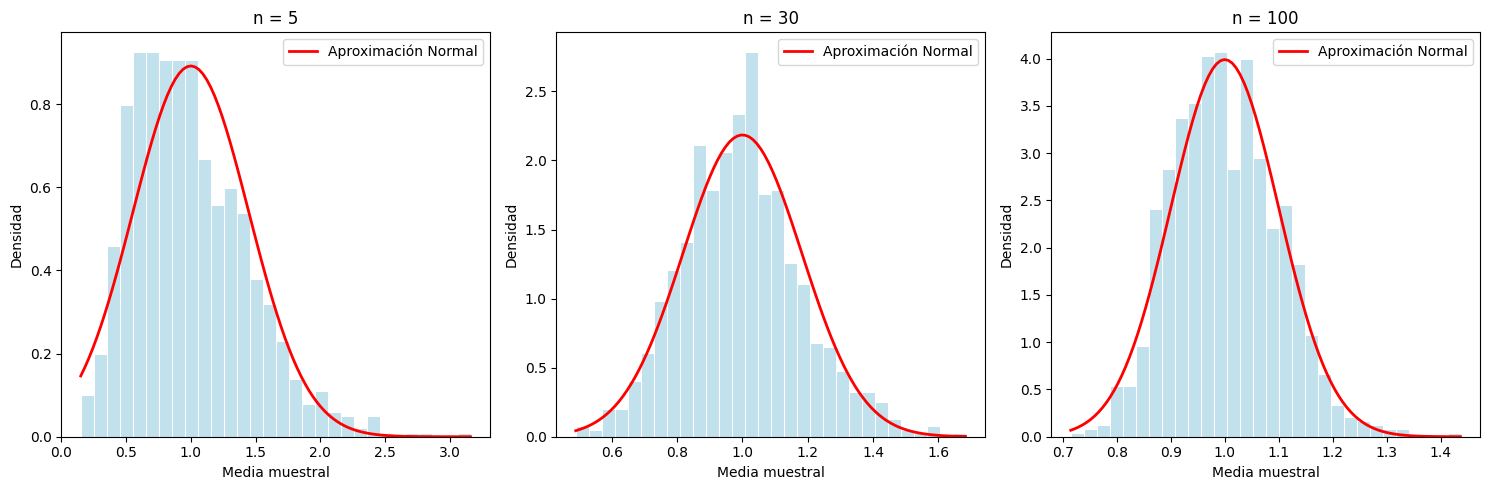

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, norm

# Parámetros
np.random.seed(123)  # Para reproducibilidad
mu = 1             # Media de la distribución exponencial
n_sim = 1000       # Número de simulaciones
sample_sizes = [5, 30, 100]  # Tamaños de muestra

# Función para simular medias muestrales
def simulate_sample_means(n):
    return [np.mean(expon.rvs(scale=mu, size=n)) for _ in range(n_sim)]

# Crear gráficos
plt.figure(figsize=(15, 5))
for i, n in enumerate(sample_sizes):
    sample_means = simulate_sample_means(n)
    plt.subplot(1, 3, i + 1)
    sns.histplot(sample_means, bins=30, stat="density", kde=False, color="lightblue", edgecolor="white")
    x = np.linspace(np.min(sample_means), np.max(sample_means), 100)
    plt.plot(x, norm.pdf(x, loc=mu, scale=mu/np.sqrt(n)), color="red", linewidth=2, label="Aproximación Normal")
    plt.title(f"n = {n}")
    plt.xlabel("Media muestral")
    plt.ylabel("Densidad")
    plt.legend()

plt.tight_layout()
plt.show()

### **b. Usando R**

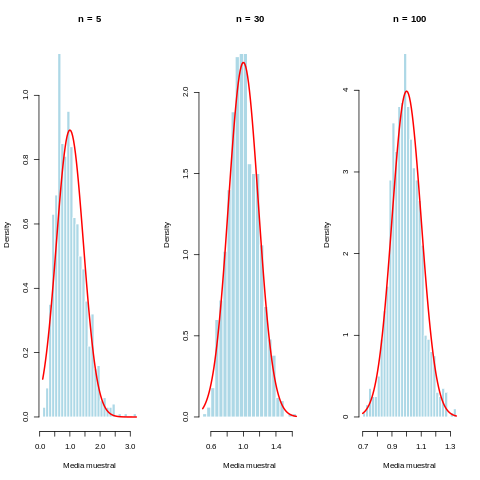

In [5]:
%%R
# Parámetros
set.seed(123)  # Para reproducibilidad
mu <- 1        # Media de la distribución exponencial
n_sim <- 1000  # Número de simulaciones
sample_sizes <- c(5, 30, 100)  # Tamaños de muestra

# Función para simular medias muestrales
simulate_sample_means <- function(n) {
  sapply(1:n_sim, function(i) mean(rexp(n, rate = 1/mu)))
}

# Crear gráficos
par(mfrow = c(1, 3))  # 1 fila, 3 columnas
for (n in sample_sizes) {
  sample_means <- simulate_sample_means(n)
  hist(sample_means, breaks = 30, freq = FALSE, main = paste("n =", n),
       xlab = "Media muestral", col = "lightblue", border = "white")
  curve(dnorm(x, mean = mu, sd = mu/sqrt(n)), add = TRUE, col = "red", lwd = 2)
}


### **10.4.  Aproximación normal de la distribución binomial**

+ **Supongamos que $Y \sim B(n, p)$, donde $Y$ es el número de éxitos en $n$ pruebas. Consideremos $Y = \sum_{i=1}^n X_i$, donde:**

$$
X_i =
\begin{cases}
1, & \text{si el resultado de la } i\text{-ésima prueba es éxito} \\
0, & \text{si es fracaso}
\end{cases}
$$

**y $X_i$ ($i = 1, 2, \dots, n$) son independientes. Por consiguiente, cuando $n$ es grande, por el TLC, la proporción de éxitos en la muestra:**

$$
\frac{Y}{n} = \frac{1}{n} \sum_{i=1}^n X_i = \bar{X}
$$

tendrá aproximadamente una distribución normal con media $\mu = E(\bar{X}) = p$ y varianza $V(\bar{X}) = \frac{p(1-p)}{n}$.

---




### **10.5. Ejemplo 8.  Aproximación normal de la distribución binomial**

###**Problema:**  
+ **El candidato A considera que puede ganar una elección en una ciudad si obtiene al menos 55% de los votos en el distrito I. Además, supone que alrededor del 50% de los votantes en la ciudad están a su favor. Si $n = 100$ votantes vienen a votar en el distrito I, ¿cuál es la probabilidad de que el candidato A pueda ganar la elección?**

**Solución:**

1. **Variable de interés:**  
   $Y =$ número de votantes en el distrito I a favor del candidato A.

2. **Modelo probabilístico:**  
   $Y \sim B(n, p)$, donde $p = 0.5$ y $n = 100$.

3. **Modelo estadístico:**  
   $Y = (X_1, X_2, \dots, X_{100})$, donde:

   $$
   X_i =
   \begin{cases}
   1, & \text{si el } i\text{-ésimo votante vota por el candidato A} \\
   0, & \text{otro caso}
   \end{cases}
   $$

4. **Respuesta a la pregunta:**  
   Calculamos la probabilidad de que la proporción de votos a favor sea al menos 55%:

   $$
   P\left( \frac{Y}{n} \geq 0.55 \right) = P\left( \frac{\frac{Y}{n} - p}{\sqrt{p(1-p)/n}} \geq \frac{0.55 - 0.5}{\sqrt{0.5(0.5)/100}} \right) \approx P(Z \geq 1) = 0.1587
   $$

+ La probabilidad de que el candidato A pueda ganar la elección es del 15.87%.


---



### **10.6. Ejemplo 6: Distribución de la media muestral para poblaciones desconocidas con muestras grandes**

### **Problema:**

**Los resultados de las pruebas finales de todos los alumnos de último año de las preparatorias de cierto estado tienen una media de 60 y una varianza de 64. Una generación específica de cierta preparatoria de $n = 100$ alumnos tuvo una media de 58. ¿Puede afirmarse que esta preparatoria sea inferior?**

+ **Solución:**

1. **Variable de interés:**  
   $Y =$ resultado en la prueba final de un alumno de último año.

2. **Modelo probabilístico:**  
   $Y \sim f_Y(y, \theta)$, donde $\theta = (\mu, \sigma^2) = (60, 64)$.

3. **Modelo estadístico:**  
   $Y = (Y_1, Y_2, \dots, Y_{100})$. El estadístico de interés es $\bar{Y} \approx N(\mu, \sigma^2 / n)$.

4. **Respuesta a la pregunta:**  
   Para determinar si esta preparatoria es inferior, calculamos la probabilidad $P(\bar{Y} \leq 58)$:

   $$
   P(\bar{Y} \leq 58) = P\left( \frac{\bar{Y} - \mu}{\sigma / \sqrt{n}} \leq \frac{58 - 60}{8 / \sqrt{100}} \right) \approx P(Z \leq -2.5) = 0.0062
   $$

+ Esta probabilidad es muy baja (0.62%). Por tanto, puede afirmarse que la calificación promedio para esta preparatoria es menor que el promedio global $\mu = 60$.
---


#### **10.6.1. Código en R:**


In addition: Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


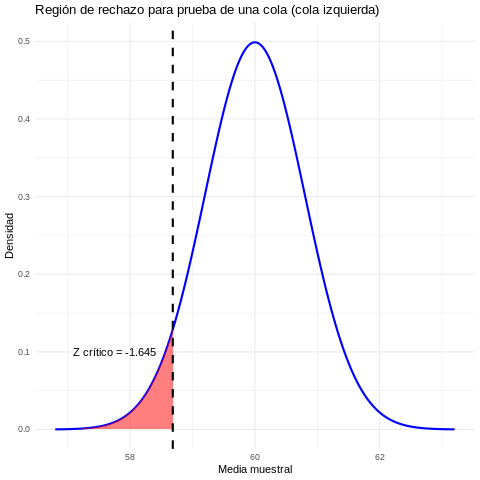

In [7]:
%%R
# Cargar librería para gráficos
#install.packages("ggplot2")
library(ggplot2)

# Parámetros
media_poblacion <- 60
desviacion_estandar <- 8 / sqrt(100)  # Error estándar
nivel_significancia <- 0.05
valor_critico <- qnorm(nivel_significancia)  # Valor crítico Z

# Crear un rango de valores para la distribución
x <- seq(media_poblacion - 4 * desviacion_estandar,
         media_poblacion + 4 * desviacion_estandar,
         length.out = 1000)
y <- dnorm(x, mean = media_poblacion, sd = desviacion_estandar)

# Crear un data frame para ggplot
datos <- data.frame(x = x, y = y)

# Gráfico
ggplot(datos, aes(x = x, y = y)) +
  geom_line(color = "blue", size = 1) +  # Curva de la distribución
  geom_area(data = subset(datos, x <= media_poblacion + valor_critico * desviacion_estandar),
            aes(x = x, y = y),
            fill = "red", alpha = 0.5) +  # Región de rechazo
  geom_vline(xintercept = media_poblacion + valor_critico * desviacion_estandar,
             color = "black", linetype = "dashed", size = 1) +  # Línea del valor crítico
  annotate("text", x = media_poblacion + valor_critico * desviacion_estandar,
           y = 0.1, label = "Z crítico = -1.645",
           hjust = 1.2, color = "black") +  # Etiqueta del valor crítico
  labs(title = "Región de rechazo para prueba de una cola (cola izquierda)",
       x = "Media muestral",
       y = "Densidad") +
  theme_minimal()

#### **10.6.2. Código en Python:**

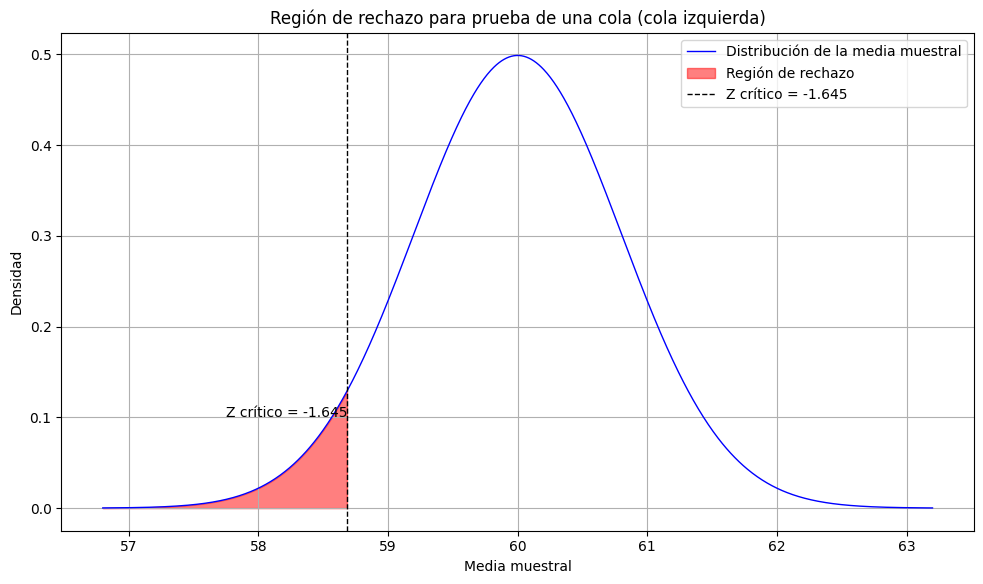

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Parámetros
media_poblacion = 60
desviacion_estandar = 8 / np.sqrt(100)  # Error estándar
nivel_significancia = 0.05
valor_critico = norm.ppf(nivel_significancia)  # Valor crítico Z

# Crear un rango de valores para la distribución
x = np.linspace(media_poblacion - 4 * desviacion_estandar,
                media_poblacion + 4 * desviacion_estandar,
                1000)
y = norm.pdf(x, loc=media_poblacion, scale=desviacion_estandar)

# Gráfico con Matplotlib y Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, color="blue", linewidth=1, label="Distribución de la media muestral")

# Región de rechazo
x_rechazo = x[x <= media_poblacion + valor_critico * desviacion_estandar]
y_rechazo = y[x <= media_poblacion + valor_critico * desviacion_estandar]
plt.fill_between(x_rechazo, y_rechazo, color="red", alpha=0.5, label="Región de rechazo")

# Línea del valor crítico
plt.axvline(media_poblacion + valor_critico * desviacion_estandar,
            color="black", linestyle="--", linewidth=1, label=f"Z crítico = {valor_critico:.3f}")

# Etiqueta del valor crítico
plt.text(media_poblacion + valor_critico * desviacion_estandar,
         0.1, f"Z crítico = {valor_critico:.3f}",
         ha='right', color='black')

# Etiquetas y título
plt.title("Región de rechazo para prueba de una cola (cola izquierda)")
plt.xlabel("Media muestral")
plt.ylabel("Densidad")
plt.legend()
sns.set_theme(style="whitegrid")
plt.grid(True)
plt.tight_layout()
plt.show()


### **10.7. Ejemplo 7: Distribución de la media muestral para poblaciones desconocidas con muestras grandes**

### **Problema:**  
+ **Los tiempos de espera para los clientes que pasan por una caja registradora a la salida de una tienda de menudeo son variables aleatorias independientes con una media de 1.5 minutos y una varianza de 1.0. ¿Cuál es la probabilidad de que se pueda atender a 100 clientes en menos de 2 horas?**

**Solución:**

1. **Variable de interés:**  
   $Y =$ tiempo (en minutos) de espera de un cliente para pasar a una caja registradora.

2. **Modelo probabilístico:**  
   $Y \sim f_Y(y, \theta)$, donde $\theta = (\mu, \sigma^2) = (1.5, 1.0)$.

3. **Modelo estadístico:**  
   $Y = (Y_1, Y_2, \dots, Y_{100})$, donde $Y_i =$ tiempo de espera del cliente $i$.

4. **Respuesta a la pregunta:**  
   Calculamos la probabilidad de que el tiempo total de espera para 100 clientes sea menor o igual a 120 minutos:

   $$
   P\left( \sum_{i=1}^{100} Y_i \leq 120 \right) = P\left( \frac{1}{100} \sum_{i=1}^{100} Y_i \leq \frac{120}{100} \right) = P(\bar{Y} \leq 1.20)
   $$

   Aplicando el TLC:

   $$
   P(\bar{Y} \leq 1.20) = P\left( \frac{\bar{Y} - \mu}{\sigma / \sqrt{n}} \leq \frac{1.20 - 1.5}{1.0 / \sqrt{100}} \right) \approx P(Z \leq -3.0) = 0.0013
   $$

   Esta pequeña probabilidad (0.13%) indica que es prácticamente imposible atender a 100 clientes en menos de 2 horas.





#### **10.7.1. Código en Python:**

La probabilidad de que se pueda atender a 100 clientes en menos de 120 minutos es aproximadamente: 0.0013


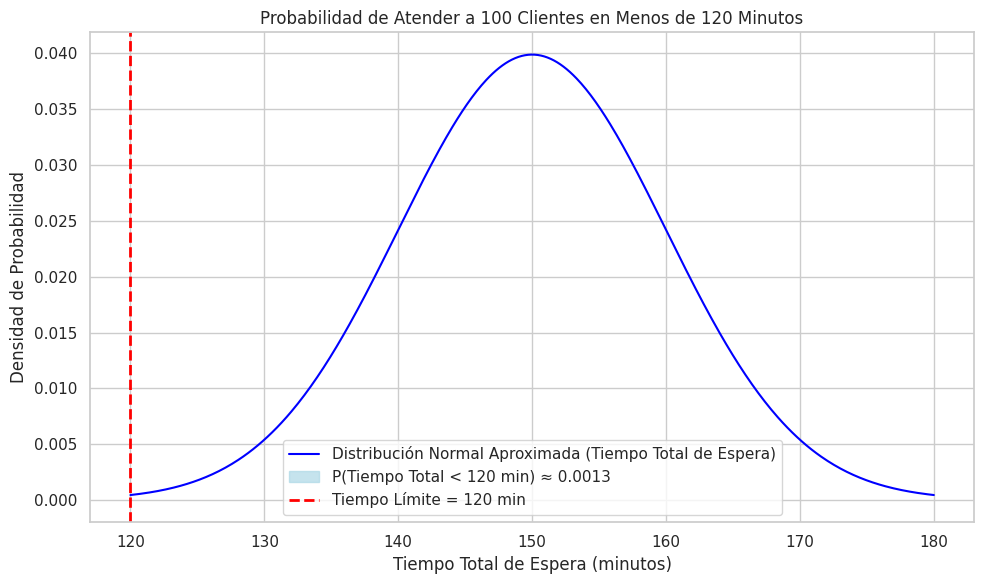

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros dados
media_espera = 1.5  # minutos por cliente
varianza_espera = 1.0  # minutos^2 por cliente
n_clientes = 100
tiempo_total_disponible = 2 * 60  # minutos (2 horas)

# Calcular la media y la desviación estándar del tiempo total de espera
media_total_espera = n_clientes * media_espera
desviacion_estandar_total_espera = np.sqrt(n_clientes * varianza_espera)

# Valor para el que queremos la probabilidad
tiempo_limite = tiempo_total_disponible

# Calcular el puntaje Z
z = (tiempo_limite - media_total_espera) / desviacion_estandar_total_espera

# Calcular la probabilidad
probabilidad = norm.cdf(z)

# Mostrar el resultado de la probabilidad
print(f"La probabilidad de que se pueda atender a {n_clientes} clientes en menos de {tiempo_total_disponible} minutos es aproximadamente: {probabilidad:.4f}")

# --- Código para dibujar las regiones ---

# Crear un rango de valores para la distribución normal aproximada
x = np.linspace(media_total_espera - 3 * desviacion_estandar_total_espera,
                media_total_espera + 3 * desviacion_estandar_total_espera,
                500)
y = norm.pdf(x, media_total_espera, desviacion_estandar_total_espera)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='Distribución Normal Aproximada (Tiempo Total de Espera)')

# Sombrear la región donde el tiempo total de espera es menor que el límite
x_shade = np.linspace(media_total_espera - 3 * desviacion_estandar_total_espera,
                      tiempo_limite,
                      500)
y_shade = norm.pdf(x_shade, media_total_espera, desviacion_estandar_total_espera)
plt.fill_between(x_shade, y_shade, color='lightblue', alpha=0.7, label=f'P(Tiempo Total < {tiempo_limite} min) ≈ {probabilidad:.4f}')

# Añadir una línea vertical en el tiempo límite
plt.axvline(tiempo_limite, color='red', linestyle='--', linewidth=2, label=f'Tiempo Límite = {tiempo_limite} min')

# Añadir etiquetas y título
plt.xlabel('Tiempo Total de Espera (minutos)')
plt.ylabel('Densidad de Probabilidad')
plt.title(f'Probabilidad de Atender a {n_clientes} Clientes en Menos de {tiempo_limite} Minutos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **10.7.2. Código en R:**

La probabilidad de que se pueda atender a 100 clientes en menos de 120 minutos es aproximadamente: 0.0013 


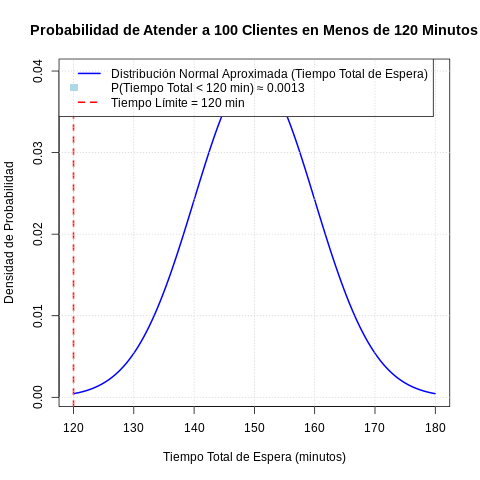

In [11]:
%%R
# Parámetros dados
media_espera <- 1.5  # minutos por cliente
varianza_espera <- 1.0  # minutos^2 por cliente
n_clientes <- 100
tiempo_total_disponible <- 2 * 60  # minutos (2 horas)

# Calcular la media y la desviación estándar del tiempo total de espera
media_total_espera <- n_clientes * media_espera
desviacion_estandar_total_espera <- sqrt(n_clientes * varianza_espera)

# Valor para el que queremos la probabilidad
tiempo_limite <- tiempo_total_disponible

# Calcular el puntaje Z
z <- (tiempo_limite - media_total_espera) / desviacion_estandar_total_espera

# Calcular la probabilidad
probabilidad <- pnorm(z)

# Mostrar el resultado de la probabilidad
cat(paste("La probabilidad de que se pueda atender a", n_clientes, "clientes en menos de", tiempo_total_disponible, "minutos es aproximadamente:", round(probabilidad, 4), "\n"))

# --- Código para dibujar las regiones ---

# Crear un rango de valores para la distribución normal aproximada
x <- seq(media_total_espera - 3 * desviacion_estandar_total_espera,
         media_total_espera + 3 * desviacion_estandar_total_espera,
         length.out = 500)
y <- dnorm(x, mean = media_total_espera, sd = desviacion_estandar_total_espera)

# Crear la gráfica
plot(x, y, type = "l", col = "blue", lwd = 2,
     xlab = "Tiempo Total de Espera (minutos)",
     ylab = "Densidad de Probabilidad",
     main = paste("Probabilidad de Atender a", n_clientes, "Clientes en Menos de", tiempo_limite, "Minutos"))

# Sombrear la región donde el tiempo total de espera es menor que el límite
x_shade <- seq(min(x), tiempo_limite, length.out = 500)
y_shade <- dnorm(x_shade, mean = media_total_espera, sd = desviacion_estandar_total_espera)
polygon(c(min(x), x_shade, tiempo_limite), c(0, y_shade, 0), col = "lightblue", border = NA)

# Añadir una línea vertical en el tiempo límite
abline(v = tiempo_limite, col = "red", lty = 2, lwd = 2)

# Añadir leyenda
legend("topleft",
       legend = c("Distribución Normal Aproximada (Tiempo Total de Espera)",
                  paste("P(Tiempo Total <", tiempo_limite, "min) ≈", round(probabilidad, 4)),
                  paste("Tiempo Límite =", tiempo_limite, "min")),
       col = c("blue", "lightblue", "red"),
       lty = c(1, NA, 2),
       lwd = c(2, NA, 2),
       fill = c(NA, "lightblue", NA),
       border = NA)

# Añadir grilla
grid()